In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import *
from sklearn.pipeline import Pipeline

C:\Users\hemje\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hemje\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\hemje\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('D:\steel.csv')

In [3]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [4]:
df.isnull().sum()

Alloy code                  0
 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (°C)           0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64

In [5]:
df['Alloy code'].value_counts()

CCB    11
LaD    11
CCA    11
MBJ    10
VbA    10
       ..
LAG     9
LAE     9
CaF     9
CaG     9
CaD     9
Name: Alloy code, Length: 95, dtype: int64

In [6]:
df.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.174929,0.310918,0.812962,0.014543,0.010602,0.143016,0.427861,0.442870,0.079148,0.060190,0.012435,0.007652,0.093989,0.000041,351.601093,328.218579,496.248087,26.789071,70.206557
std,0.059674,0.086871,0.342775,0.005244,0.004024,0.172746,0.457568,0.394383,0.058481,0.096403,0.013067,0.002321,0.172533,0.000261,189.714773,131.653232,239.710650,8.806595,12.389289
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,27.000000,162.000000,10.000000,18.000000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,220.000000,413.000000,20.000000,62.000000
50%,0.160000,0.300000,0.680000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,290.000000,479.000000,26.000000,71.000000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,432.500000,575.000000,31.000000,80.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,690.000000,6661.000000,78.000000,94.000000


In [7]:
df.columns=df.columns.str.strip()

<AxesSubplot:>

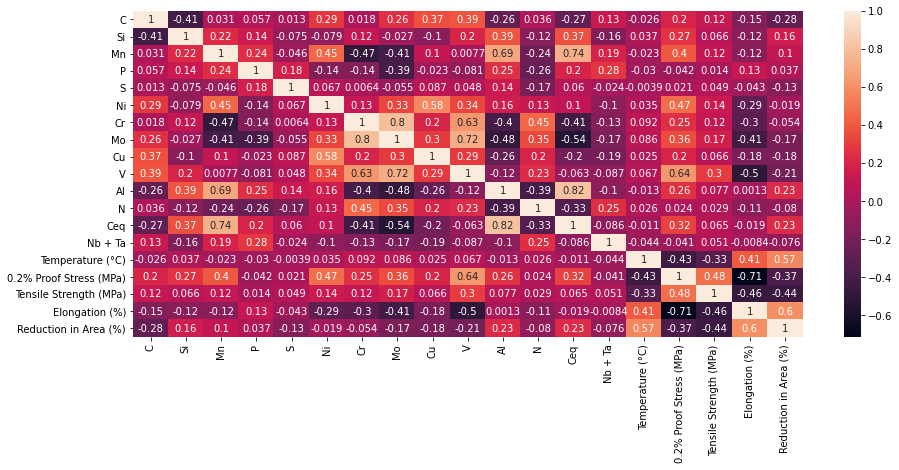

In [8]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [9]:
df.columns

Index(['Alloy code', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Mo', 'Cu', 'V',
       'Al', 'N', 'Ceq', 'Nb + Ta', 'Temperature (°C)',
       '0.2% Proof Stress (MPa)', 'Tensile Strength (MPa)', 'Elongation (%)',
       'Reduction in Area (%)'],
      dtype='object')

In [10]:
df=df.drop(['Reduction in Area (%)','Elongation (%)','0.2% Proof Stress (MPa)'],axis=1)

In [11]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),Tensile Strength (MPa)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,490
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,454
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,465
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,495
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,489


In [12]:
df['Temperature (K)']=df['Temperature (°C)'].apply(lambda x:x+273)

In [13]:
df.drop('Temperature (°C)',axis=1,inplace=True)

In [14]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Tensile Strength (MPa),Temperature (K)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,490,300
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,454,373
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,465,473
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,495,573
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,489,673


<AxesSubplot:xlabel='Alloy code'>

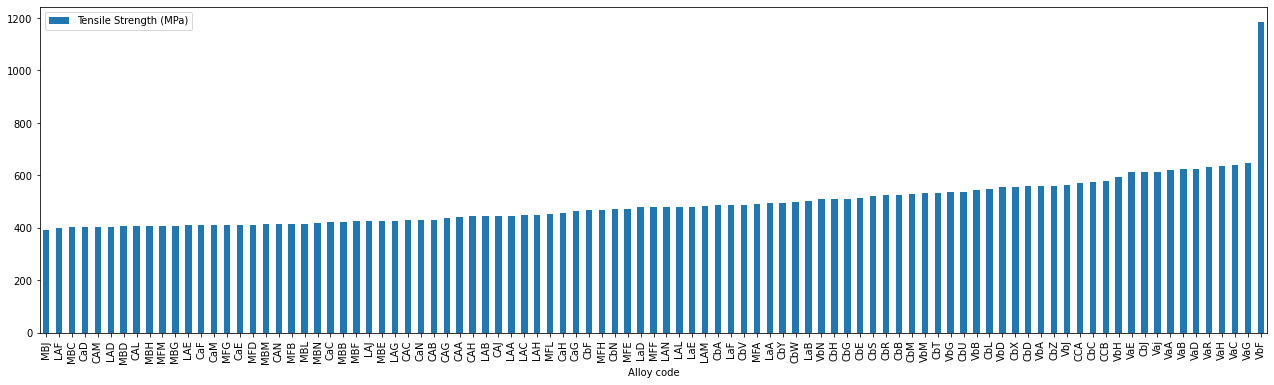

In [15]:
df.groupby('Alloy code')[['Tensile Strength (MPa)','Alloy code']].mean().sort_values('Tensile Strength (MPa)').plot(kind='bar',figsize=(22,6))

<AxesSubplot:xlabel='Alloy code'>

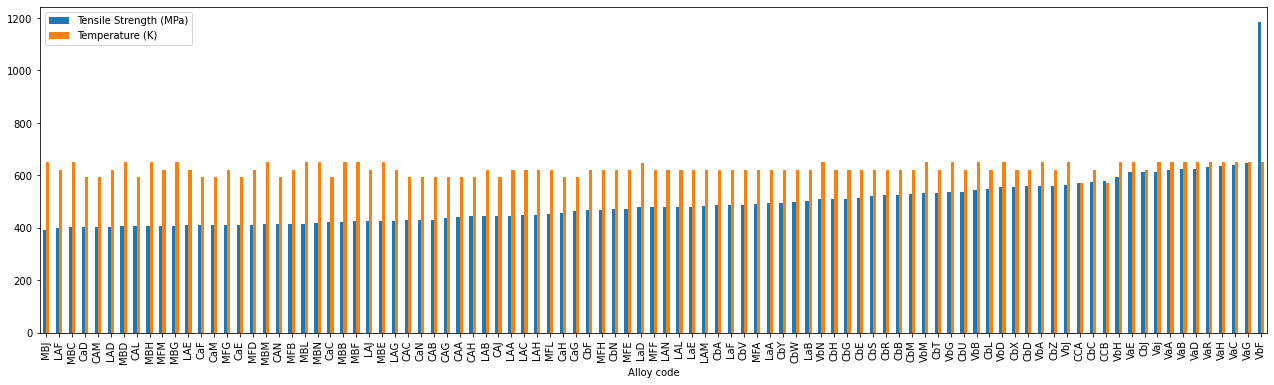

In [16]:
df.groupby('Alloy code')[['Tensile Strength (MPa)','Temperature (K)']].mean().sort_values('Tensile Strength (MPa)').plot(kind='bar',figsize=(22,6))

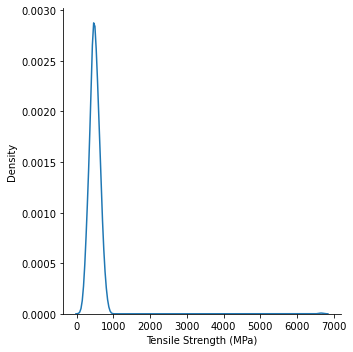

In [17]:
sns.displot(df['Tensile Strength (MPa)'],kind='kde')

C:\Users\hemje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tensile Strength (MPa)'>

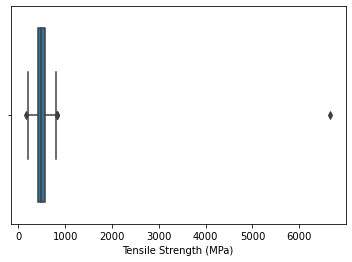

In [18]:
sns.boxplot(df['Tensile Strength (MPa)'])

In [19]:
df_new=df[df['Tensile Strength (MPa)']<6000]

C:\Users\hemje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tensile Strength (MPa)'>

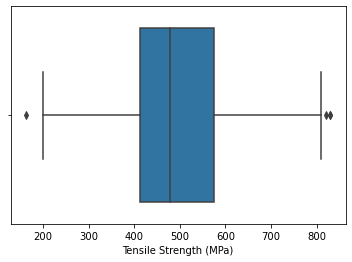

In [20]:
sns.boxplot(df_new['Tensile Strength (MPa)'])

<AxesSubplot:xlabel='Temperature (K)', ylabel='Tensile Strength (MPa)'>

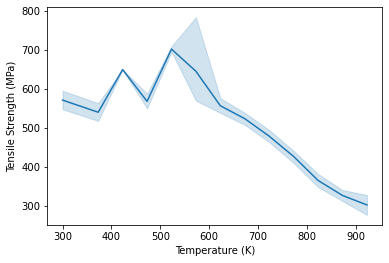

In [21]:
sns.lineplot(x='Temperature (K)',y='Tensile Strength (MPa)',data=df)

<AxesSubplot:xlabel='C', ylabel='Tensile Strength (MPa)'>

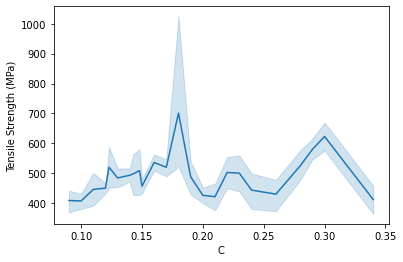

In [22]:
sns.lineplot(x='C',y='Tensile Strength (MPa)',data=df)

In [23]:
X=df_new.drop(['Tensile Strength (MPa)','Alloy code'],axis=1)
y=df_new['Tensile Strength (MPa)']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.model_selection import cross_val_score
pipeline=[]
pipeline.append(['Linear',Pipeline([('scale',StandardScaler()),('model',LinearRegression())])])
pipeline.append(['Poly',Pipeline([('scale',StandardScaler()),('poly',PolynomialFeatures(degree=3)),('model',LinearRegression())])])
pipeline.append(['RF',Pipeline([('scale',StandardScaler()),('model',RandomForestRegressor())])])
pipeline.append(['GBR',Pipeline([('scale',StandardScaler()),('model',GradientBoostingRegressor())])])
pipeline.append(['Ada',Pipeline([('scale',StandardScaler()),('model',AdaBoostRegressor())])])
pipeline.append(['svr',Pipeline([('scale',StandardScaler()),('model',SVR())])])
pipeline.append(['Ridge',Pipeline([('scale',StandardScaler()),('model',Ridge())])])
pipeline.append(['Lasso',Pipeline([('scale',StandardScaler()),('model',Lasso())])])
pipeline.append(['LGBMR',Pipeline([('scale',StandardScaler()),('model',LinearRegression())])])
pipeline.append(['Enet',Pipeline([('scale',StandardScaler()),('model',ElasticNet())])])
pipeline.append(['XGB',Pipeline([('scale',StandardScaler()),('model',XGBRegressor())])])

for i,j in pipeline:
    cvc=cross_val_score(j,x_train,y_train,scoring='neg_mean_squared_error').mean()
    print(f'{i}',abs(cvc))

Linear 4911.281831934352
Poly 1400.1281106749248
RF 807.1602254076972
GBR 754.2701272890479
Ada 2495.3771934602814
svr 12852.885272210468
Ridge 4909.07627235231
Lasso 4867.5867989980225
LGBMR 4911.281831934352
Enet 6004.028758531898
XGB 618.2728896371659


In [26]:
pp=Pipeline([
    ('scale',StandardScaler()),
    ('model',XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=10,reg_lambda=3))
])

In [27]:
y_pred=pp.fit(x_train,y_train).predict(x_test)

In [28]:
r2_score(y_test,y_pred)

0.981342409429574

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

17.021289681201925

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

17.021289681201925

In [31]:
mean_absolute_error(y_test,y_pred)

12.113137917440445

In [32]:
y_test[:5]

252    321
696    634
144    319
749    495
145    254
Name: Tensile Strength (MPa), dtype: int64

In [33]:
y_pred[:5]

array([274.73813, 623.1612 , 320.6207 , 483.76004, 256.68335],
      dtype=float32)

In [34]:
x_train.isnull().any()

C                  False
Si                 False
Mn                 False
P                  False
S                  False
Ni                 False
Cr                 False
Mo                 False
Cu                 False
V                  False
Al                 False
N                  False
Ceq                False
Nb + Ta            False
Temperature (K)    False
dtype: bool

In [35]:
from sklearn.model_selection import GridSearchCV
param={
    'model__n_estimators':[30,50,60,70,100,200],
    'model__max_depth':[2,4,6,8,10,12,14,16],
    'model__learning_rate':[0.1,0.01,0.001],
    'model__reg_lambda':[1,2,3,5,7]
}
gcv=GridSearchCV(pp,param_grid=param,scoring='neg_mean_squared_error')

In [36]:
# best=gcv.fit(x_train+0.000001,y_train)
# best.best_params_

In [37]:
from joblib import *

In [38]:
dump(pp,'steel.ml')

['steel.ml']